In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Initialize Plotly for offline mode
init_notebook_mode(connected=True)


In [ ]:
import os

IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018

# Model parameters
NO_EPOCHS = 50
BATCH_SIZE = 128

IS_LOCAL = False

# Set PATH based on IS_LOCAL
if IS_LOCAL:
    PATH = r"/content/fashion-mnist_test.csv"
else:
    PATH = r"/content/fashion-mnist_test.csv"

In [ ]:
train_file = r"/content/fashion-mnist_test.csv"
test_file  = r"/content/fashion-mnist_test.csv"
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

FileNotFoundError: [Errno 2] No such file or directory: '/content/fashion-mnist_test.csv'

In [ ]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])


Fashion MNIST train -  rows: 10000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [ ]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)


T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


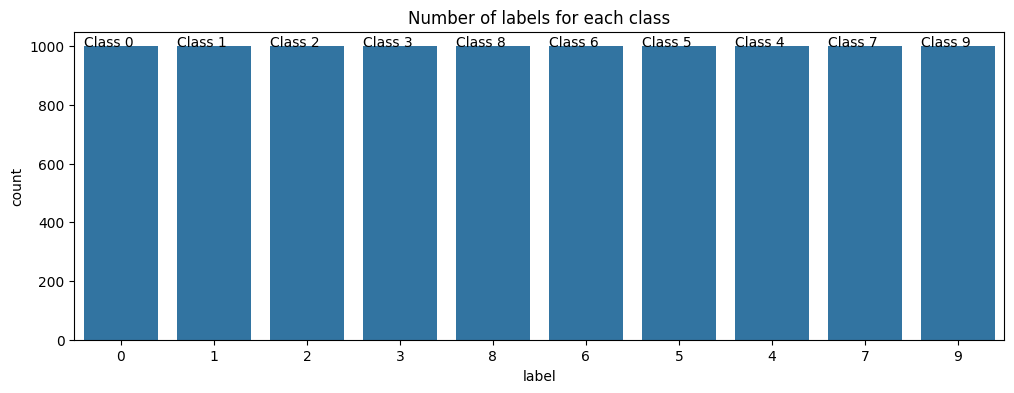

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_label_per_class(data):
    # Ensure input is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame.")

    f, ax = plt.subplots(1, 1, figsize=(12, 4))

    # Correct countplot syntax
    g = sns.countplot(x="label", data=data, order=data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    # Ensure labels variable exists and has a mapping
    labels = {label: f"Class {label}" for label in data["label"].unique()}
    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height() + 0.1))

    plt.show()

# Example call to the function
plot_label_per_class(train_data)

In [ ]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


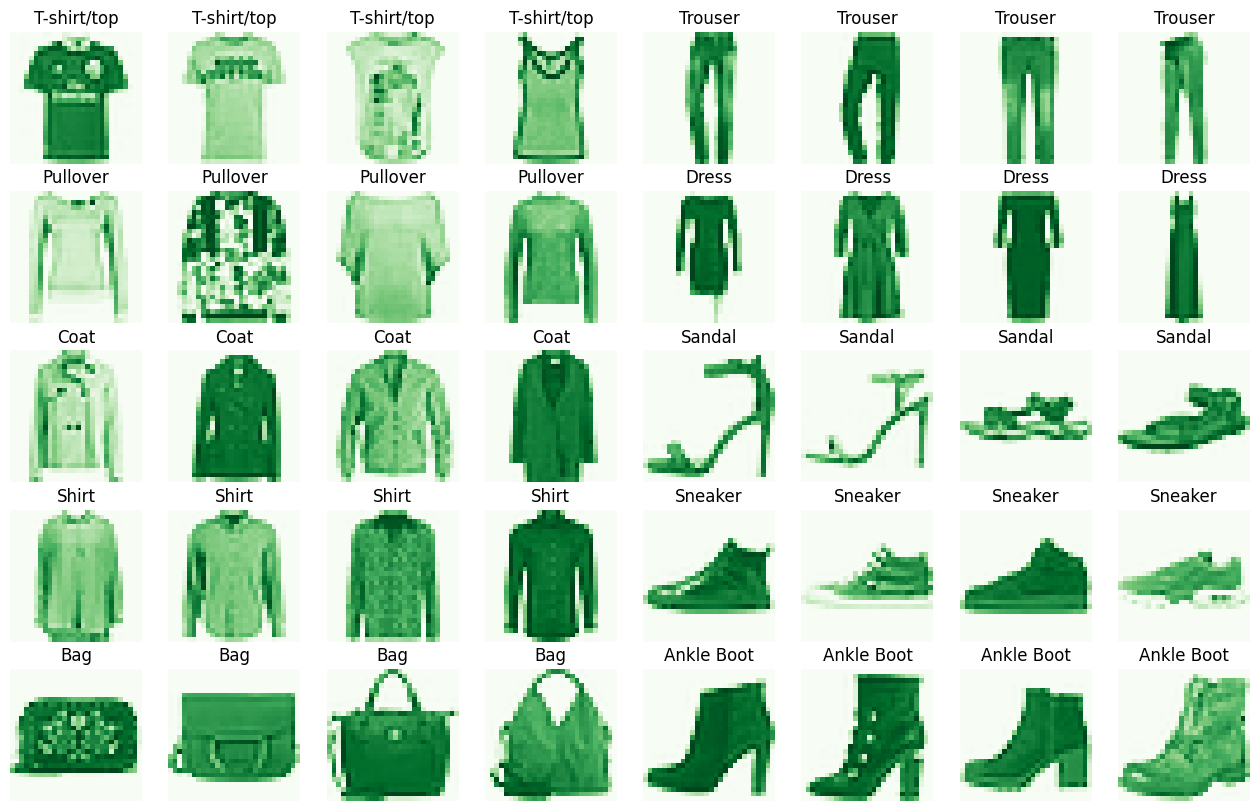

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

plot_sample_images(train_sample_images,train_sample_labels, "Greens")

Total number of sample images to plot:  40


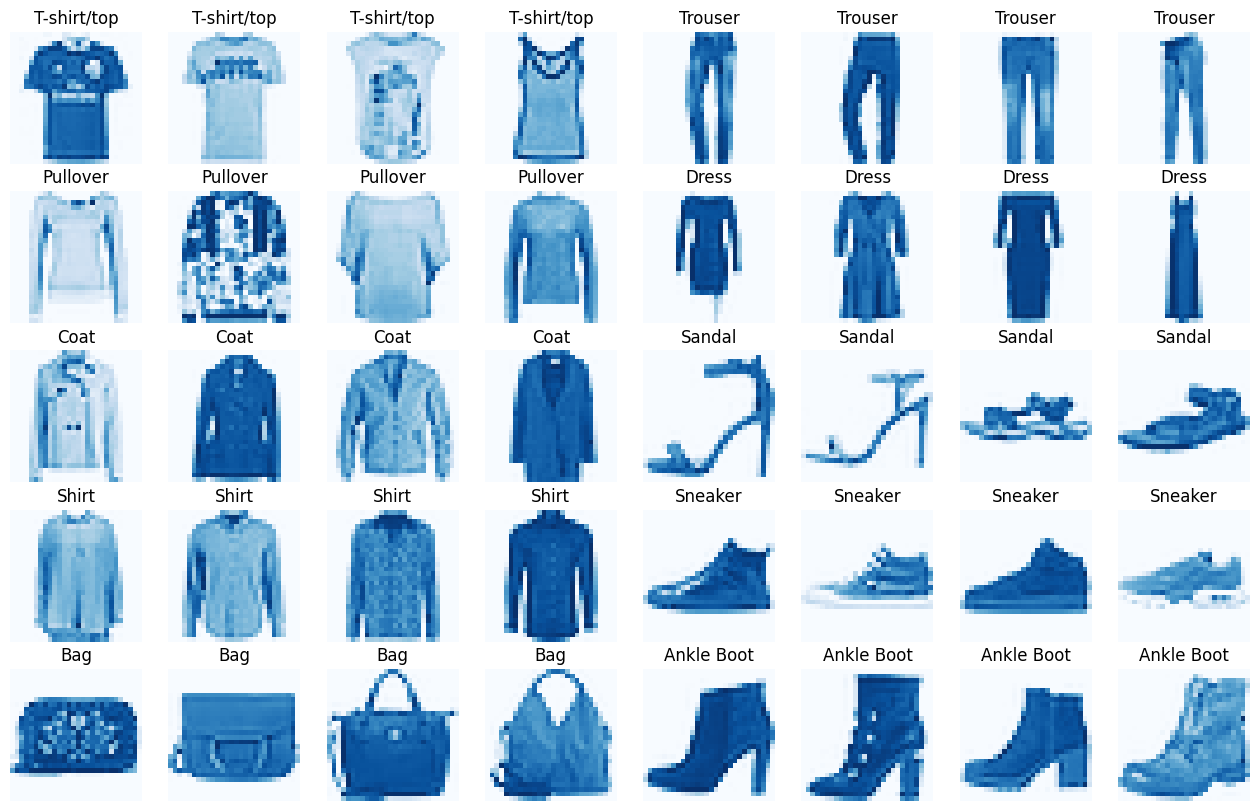

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

In [ ]:
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [ ]:
from tensorflow.keras.utils import to_categorical

# Data preprocessing function
def data_preprocessing(raw):
    # Convert labels to one-hot encoding
    out_y = to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:, 1:]  # Assuming the first column is labels
    # Normalize image data
    out_x = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1) / 255.0
    return out_x, out_y

In [ ]:
from sklearn.model_selection import train_test_split

# Check train_data
print("train_data head:")
print(train_data.head())

# Preprocess the data
try:
    X, y = data_preprocessing(train_data)
    print("Data preprocessing successful.")
    print("X shape:", X.shape)
    print("y shape:", y.shape)
except Exception as e:
    print("Error during data preprocessing:", e)
    raise

# Split the data
try:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    print("Train/validation split successful.")
    print("X_train shape:", X_train.shape)
    print("X_val shape:", X_val.shape)
    print("y_train shape:", y_train.shape)
    print("y_val shape:", y_val.shape)
except Exception as e:
    print("Error during train/validation split:", e)
    raise

train_data head:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0  

In [ ]:
# Ensure X_test is created by preprocessing the test data
try:
    X_test, y_test = data_preprocessing(test_data)
    print("Test data preprocessing successful.")
    print("X_test shape:", X_test.shape)
except Exception as e:
    print("Error during test data preprocessing:", e)
    raise

# Print the shapes for train, validation, and test sets
print("Fashion MNIST train -  rows:", X_train.shape[0], " columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:", X_val.shape[0], " columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:", X_test.shape[0], " columns:", X_test.shape[1:4])

Test data preprocessing successful.
X_test shape: (10000, 28, 28, 1)
Fashion MNIST train -  rows: 8000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 2000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


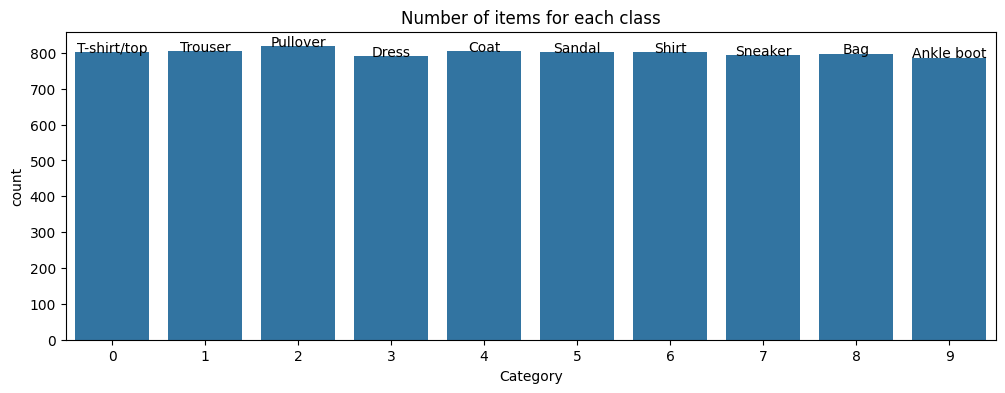

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure the labels are defined (for your specific dataset)
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def plot_count_per_class(yd):
    # Convert yd to a pandas Series for countplot
    ydf = pd.Series(yd)

    f, ax = plt.subplots(1, 1, figsize=(12, 4))
    g = sns.countplot(x=ydf, order=np.arange(0, 10))  # Use 'x=' to specify the axis in countplot
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")

    for p, label in zip(g.patches, np.arange(0, 10)):
        g.annotate(labels[label], (p.get_x() + p.get_width() / 2, p.get_height() + 0.1), ha="center")

    plt.show()

# Assuming y_train is the one-hot encoded labels, get the class label by using np.argmax
plot_count_per_class(np.argmax(y_train, axis=1))

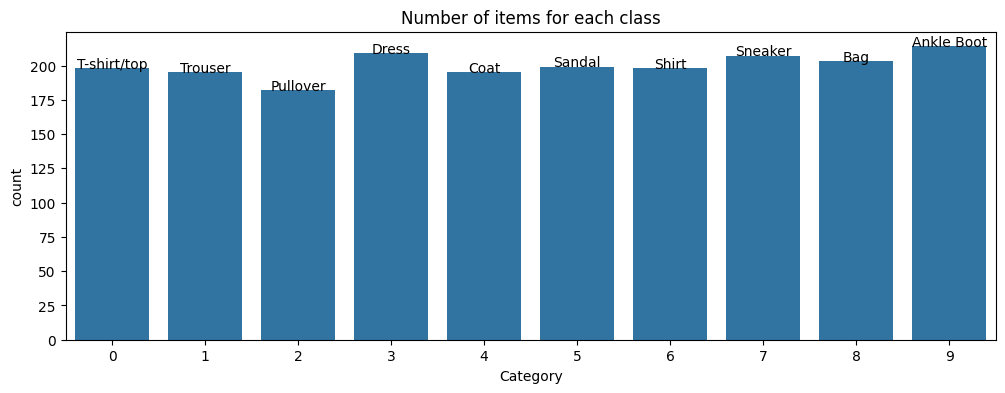

{0: 198,
 1: 195,
 2: 182,
 3: 209,
 4: 195,
 5: 199,
 6: 198,
 7: 207,
 8: 203,
 9: 214}

In [ ]:
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))

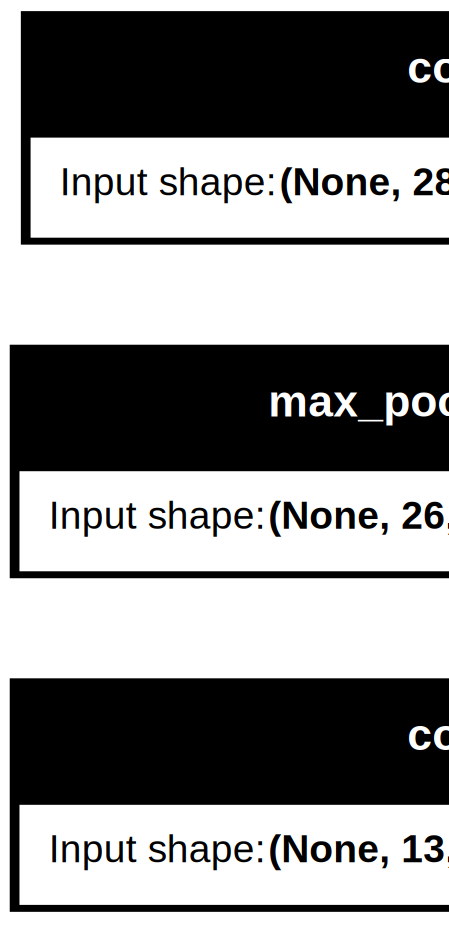

In [ ]:
import tensorflow as tf
from tensorflow import keras
# from keras.utils import plot_model # Removed this line
# from keras.utils.vis_utils import model_to_dot # Removed this line
# plot_model(model, to_file='model.png') # Removed this line

# Use tf.keras.utils instead of keras.utils
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

# Import SVG if needed
from IPython.display import SVG
SVG(tf.keras.utils.model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install pydot
!pip install graphviz

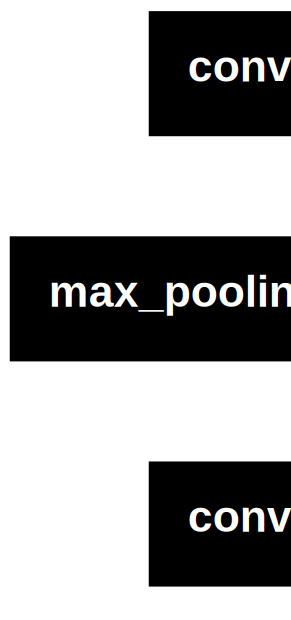

In [ ]:
from tensorflow.keras.utils import plot_model, model_to_dot
from IPython.display import SVG

# Save and plot the model architecture to a file
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture inline in Jupyter
SVG(model_to_dot(model).create(prog='dot', format='svg'))

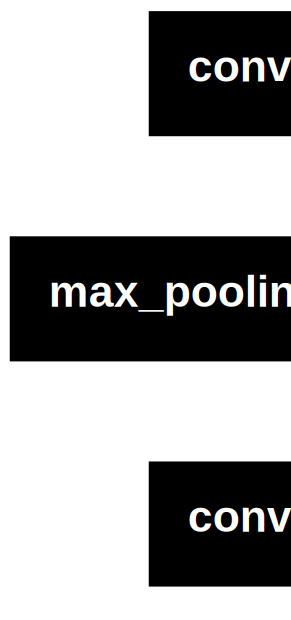

In [ ]:
# Import necessary libraries
import tensorflow as tf

# Use tf.keras.utils instead of keras.utils.vis_utils
from tensorflow.keras.utils import plot_model, model_to_dot

# ... (Rest of your code)

# Plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture inline in Jupyter (if needed)
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.5807 - loss: 1.1865 - val_accuracy: 0.7805 - val_loss: 0.6173
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7938 - loss: 0.5659 - val_accuracy: 0.7930 - val_loss: 0.5490
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8299 - loss: 0.4571 - val_accuracy: 0.8165 - val_loss: 0.4698
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8530 - loss: 0.3959 - val_accuracy: 0.8295 - val_loss: 0.4710
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8748 - loss: 0.3499 - val_accuracy: 0.8320 - val_loss: 0.4194
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.8878 - loss: 0.3040 - val_accuracy: 0.8560 - val_loss: 0.3939
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8981 - loss: 0.2724 - val_accuracy: 0.8455 - val_loss: 0.4272
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9036 - loss: 0.2667 - val_accuracy

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1682274490594864
Test accuracy: 0.9758999943733215


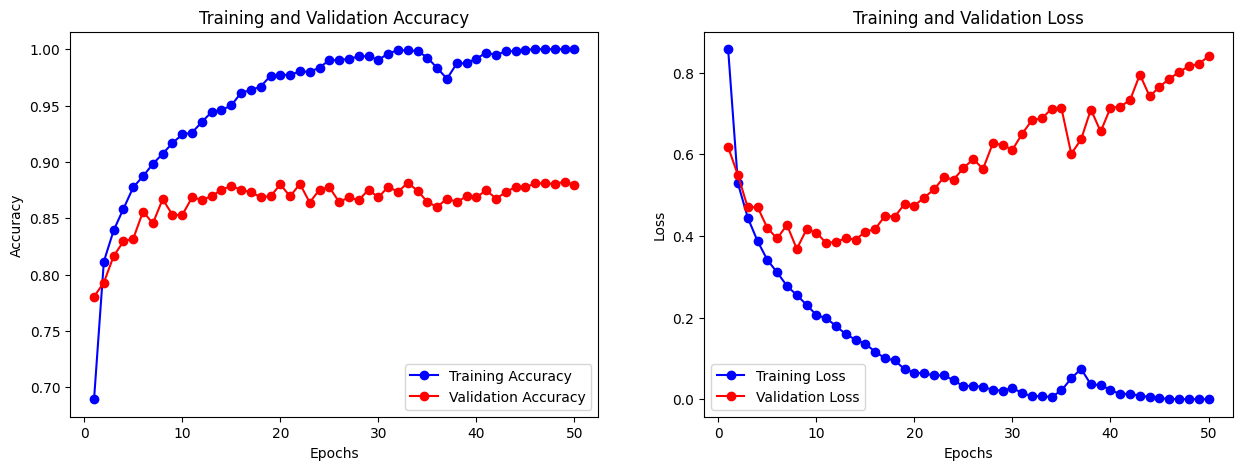

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Initialize Plotly for offline mode
init_notebook_mode(connected=True)

import os

# ... (rest of the code before the plotting functions)

def plot_accuracy_and_loss(train_model):
    """Plots the training and validation accuracy and loss curves."""

    # Extract the training history
    hist = train_model.history

    # Get accuracy and loss values
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(1, len(acc) + 1)  # Get epochs for x-axis

    # Create the figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy curves
    ax1.plot(epochs, acc, 'bo-', label='Training Accuracy')
    ax1.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    ax1.set_title('Training and Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot loss curves
    ax2.plot(epochs, loss, 'bo-', label='Training Loss')
    ax2.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    ax2.set_title('Training and Validation Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Display the plots
    plt.show()

# ... (rest of the code after the plotting functions)

# Train the model (your model.fit call)

# Plot the results
plot_accuracy_and_loss(train_model)
